In [4]:
import matplotlib.pyplot as plt
import numpy as np
from experiment_bc_run import CNNPolicy
import torch

In [5]:
data = np.load("./bc-logs/combined_bc_data.npz")

In [15]:
obs = data["obs"]
actions = data["actions"]

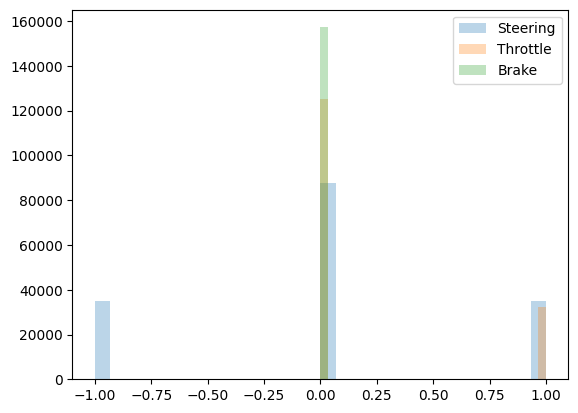

In [4]:
plt.hist(actions[:,0], bins=30, alpha=0.3, label='Steering')
plt.hist(actions[:, 1], bins=30, alpha=0.3, label="Throttle")
plt.hist(actions[:, 2], bins=30, alpha=0.3, label="Brake")
plt.legend()
plt.show()

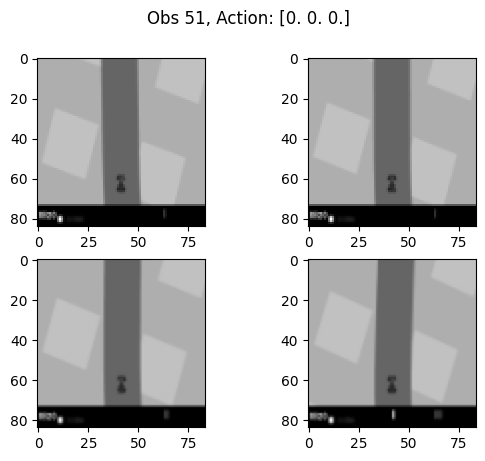

In [5]:
obs_idx = 51
img = obs[obs_idx]
action = actions[obs_idx]
fig, axes = plt.subplots(2,2)
axes[1, 1].imshow(img[0], cmap="gray")
axes[1,0].imshow(img[1], cmap="gray")
axes[0,1].imshow(img[2], cmap="gray")
axes[0,0].imshow(img[3], cmap="gray")
plt.suptitle(f"Obs {obs_idx}, Action: {action}")
plt.show()

In [6]:
model_file = "bc_policy.pth"
print(f"Loading policy from {model_file}...")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
policy = CNNPolicy(rnn=False)
checkpoint = torch.load(model_file, map_location=device)
policy.load_state_dict(checkpoint["model_state_dict"])
policy.to(device)
policy.eval()

Loading policy from bc_policy.pth...


CNNPolicy(
  (conv1): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
  (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=3136, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=3, bias=True)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.4, inplace=False)
  (relu): ReLU()
)

In [7]:
policy_input = torch.tensor(img, dtype=torch.float32).unsqueeze(0).to(device)

with torch.no_grad():
    pred_action = policy(policy_input).cpu().squeeze(0).numpy()
print(f"Predicted action: {pred_action}, True action: {action}")

Predicted action: [-0.1544631   0.5557555   0.02699744], True action: [0. 0. 0.]


In [8]:
num_test = 20
indices = np.random.choice(range(len(obs)), size=num_test, replace=False)
imgs = obs[indices]
actions_batch = actions[indices]
policy_inputs = torch.tensor(imgs, dtype=torch.float32).to(device)
with torch.no_grad():
    pred_actions = policy(policy_inputs).cpu().numpy()
for i in range(num_test):
    print(f"Predicted action: {pred_actions[i]}, True action: {actions_batch[i]}")

Predicted action: [-0.17750707  0.3323531   0.01206204], True action: [-1.  0.  0.]
Predicted action: [0.49468857 0.66161597 0.02057342], True action: [1. 0. 0.]
Predicted action: [-0.93234324  0.18067087  0.0215985 ], True action: [-1.  0.  0.]
Predicted action: [-0.26436317  0.39645162  0.03034563], True action: [0. 0. 0.]
Predicted action: [-0.5497786   0.6775719   0.02950866], True action: [-1.  0.  0.]
Predicted action: [-0.968937    0.0671837   0.01594477], True action: [-1.  0.  0.]
Predicted action: [0.4770554  0.31390887 0.0085878 ], True action: [1. 0. 0.]
Predicted action: [0.9340798  0.02302849 0.010505  ], True action: [1. 0. 0.]
Predicted action: [-0.06780116  0.566753    0.02789096], True action: [-0.  1.  0.]
Predicted action: [0.6022745  0.26855648 0.02157002], True action: [-0.  0.  0.]
Predicted action: [-0.11155073  0.5811063   0.02260364], True action: [-0.  1.  0.]
Predicted action: [0.33930752 0.52844185 0.03380628], True action: [0. 0. 0.]
Predicted action: [-0.

View full run

In [9]:
import glob
import matplotlib.animation as animation
data = None
for file in glob.glob("./bc-logs/sid/excellent_runs/*.npz"):
    print(f"File: {file}")
    data = np.load(file)
    print(f"  Obs shape: {data['obs'].shape}, Actions shape: {data['actions'].shape}")
    break

File: ./bc-logs/sid/excellent_runs/3f1a_bc.npz
  Obs shape: (893, 4, 84, 84), Actions shape: (893, 3)


/tmp/ipykernel_7320/4170794423.py:18: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, interval=50, blit=True)


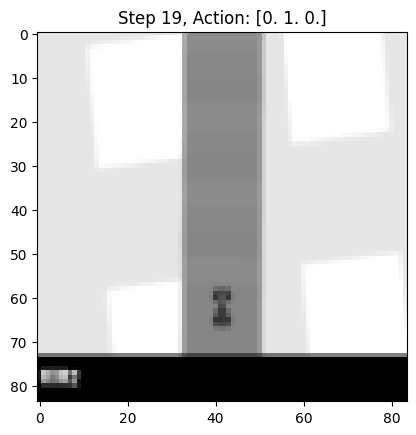

In [10]:
fig, ax = plt.subplots()
ims = []
indx = 0
current_title = ax.set_title(f"")
current_img = ax.imshow(data["obs"][0][0], cmap="gray")
def update(frame):
    current_img = ax.imshow(data["obs"][frame][0], cmap="gray")

    # Update the title text
    current_title.set_text(f"Step {i}, Action: {data['actions'][i]}")
    return current_img, current_title


# for i in range(len(data["obs"])//50):
#     current_title = ax.set_title(f"Step {i}, Action: {data['actions'][i]}")
#     im = ax.imshow(data["obs"][i][0], animated=True, cmap="gray")
#     ims.append([im])
ani = animation.FuncAnimation(fig, update, interval=50, blit=True)
# plt.show()

In [11]:
fig.show()

/tmp/ipykernel_7320/89474557.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [ ]:
data2 = np.load("./bc-logs/bc_data_online.npz")
obs2 = data2["obs"]
actions2 = data2["actions"]

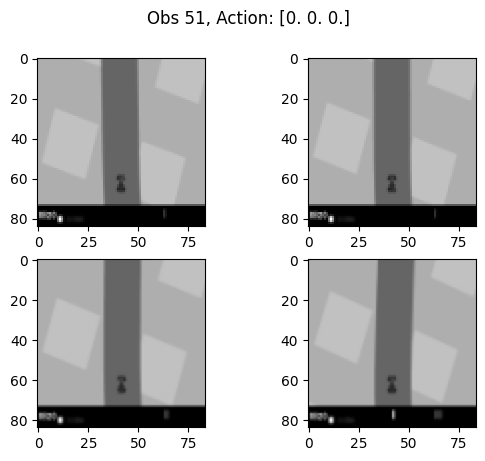

In [20]:
obs_idx = 51
img = obs[obs_idx]
action = actions[obs_idx]
fig, axes = plt.subplots(2, 2)
axes[1, 1].imshow(img[0], cmap="gray")
axes[1, 0].imshow(img[1], cmap="gray")
axes[0, 1].imshow(img[2], cmap="gray")
axes[0, 0].imshow(img[3], cmap="gray")
plt.suptitle(f"Obs {obs_idx}, Action: {action}")
plt.show()

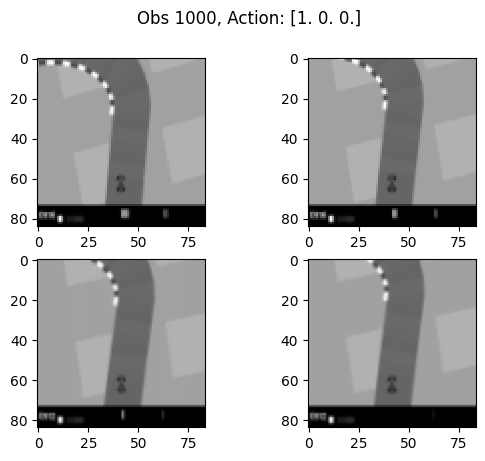

In [ ]:
obs_idx = 1000
img = obs2[obs_idx]
action = actions2[obs_idx]
fig, axes = plt.subplots(2, 2)
axes[1, 1].imshow(img[0], cmap="gray")
axes[1, 0].imshow(img[1], cmap="gray")
axes[0, 1].imshow(img[2], cmap="gray")
axes[0, 0].imshow(img[3], cmap="gray")
plt.suptitle(f"Obs {obs_idx}, Action: {action}")
plt.show()